In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import r2_score
from tensorflow.keras.utils import set_random_seed
set_random_seed(42)

In [2]:
# loading the dataset
df = pd.read_csv('/content/graduate_admission_dataset.csv')
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
# getting the info. of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [4]:
# checking duplicates
df.duplicated().sum()

0

In [5]:
# creating X & y
X = df.drop(['Chance of Admit'], axis=1)
y = df['Chance of Admit']

In [6]:
# splitting the data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

In [7]:
# scaling the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# defining an ANN architecture; shape (500, 8) excluding target = 7
model = Sequential()
model.add(Dense(7, activation='relu', input_dim=7))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='linear'))

In [9]:
# getting an overall summary of the architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [10]:
# compilation
model.compile(loss='mse', optimizer='Adam')

In [11]:
# training
history = model.fit(X_train, y_train, batch_size=50, epochs=150, validation_split=0.2, verbose=0)

In [12]:
# printing the performance
print('R2:', (r2_score(y_test, model.predict(X_test)) * 100))

4/4 [==============================] - 0s 5ms/step
R2: 80.54582823096652


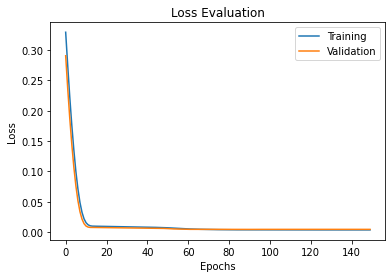

In [13]:
# plotting the loss
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Evaluation', size=12)
plt.legend();